In [5]:
# =============================
# Dimensionality Reduction Project
# =============================

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier  # Change if regression/clustering
from sklearn.metrics import accuracy_score  # Change if regression/clustering metric



In [6]:
# -----------------------------
# 1. Load Dataset
# -----------------------------
# Example: Wine Quality dataset (UCI)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
print(data.head())
print(data.info())

# Define features and target
X = data.drop('quality', axis=1)
y = data['quality']  # Classification (you can binarize or leave as multiclass)

# Optional: convert regression target to classification (e.g., good/bad wine)
y = (y >= 6).astype(int)  # 0=bad, 1=good



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
# -----------------------------
# 2. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [8]:
# -----------------------------
# 3. Baseline Model on Original Features
# -----------------------------
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Baseline Train Accuracy: {train_acc:.4f}")
print(f"Baseline Test Accuracy: {test_acc:.4f}")



Baseline Train Accuracy: 1.0000
Baseline Test Accuracy: 0.7875


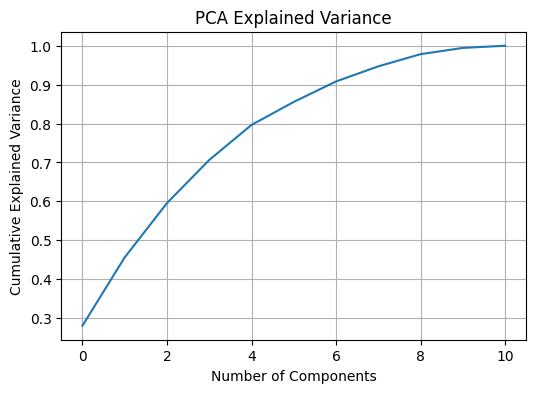

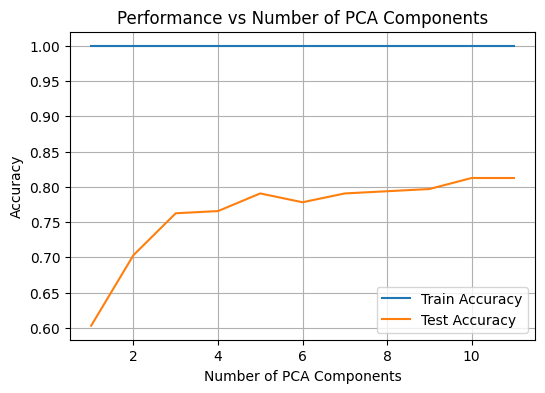

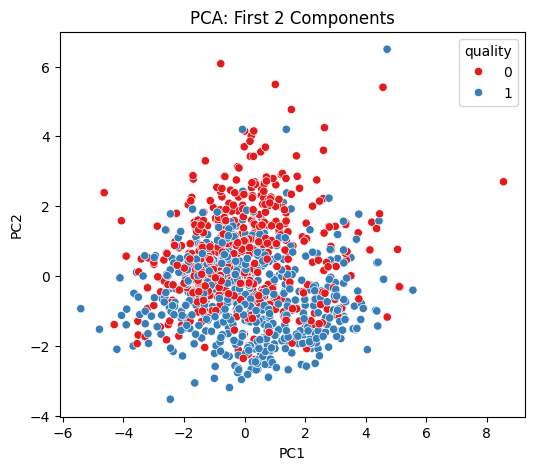

In [9]:
# -----------------------------
# 4. PCA (Linear Dimensionality Reduction)
# -----------------------------
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance plot
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Performance vs number of PCA components
max_components = X_train_pca.shape[1]
train_acc_list = []
test_acc_list = []

for n in range(1, max_components+1):
    clf_pca = RandomForestClassifier(random_state=42)
    clf_pca.fit(X_train_pca[:,:n], y_train)
    train_acc_list.append(accuracy_score(y_train, clf_pca.predict(X_train_pca[:,:n])))
    test_acc_list.append(accuracy_score(y_test, clf_pca.predict(X_test_pca[:,:n])))

plt.figure(figsize=(6,4))
plt.plot(range(1, max_components+1), train_acc_list, label='Train Accuracy')
plt.plot(range(1, max_components+1), test_acc_list, label='Test Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Performance vs Number of PCA Components')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of first 2 principal components
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First 2 Components')
plt.show()



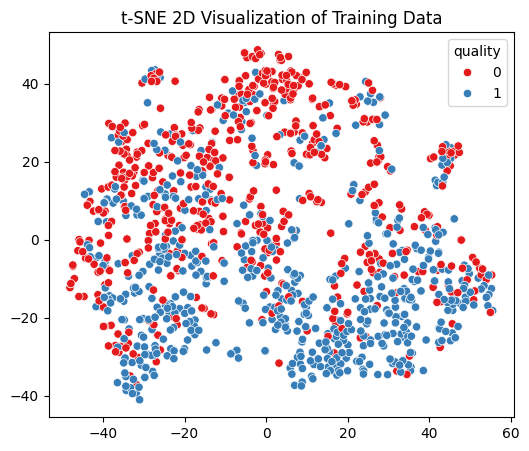

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

In [10]:
# -----------------------------
# 5. t-SNE (Non-Linear Dimensionality Reduction)
# -----------------------------
# t-SNE is typically done in 2D or 3D for visualization
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=y_train, palette='Set1')
plt.title('t-SNE 2D Visualization of Training Data')
plt.show()

# Optional: performance vs t-SNE components (if using more than 2 dimensions)
tsne_dims = [2, 5, 10]
train_acc_tsne = []
test_acc_tsne = []

for n in tsne_dims:
    tsne = TSNE(n_components=n, random_state=42, init='pca', learning_rate='auto')
    X_train_t = tsne.fit_transform(X_train_scaled)
    X_test_t = TSNE(n_components=n, random_state=42, init='pca', learning_rate='auto').fit_transform(X_test_scaled)
    clf_tsne = RandomForestClassifier(random_state=42)
    clf_tsne.fit(X_train_t, y_train)
    train_acc_tsne.append(accuracy_score(y_train, clf_tsne.predict(X_train_t)))
    test_acc_tsne.append(accuracy_score(y_test, clf_tsne.predict(X_test_t)))

plt.figure(figsize=(6,4))
plt.plot(tsne_dims, train_acc_tsne, label='Train Accuracy')
plt.plot(tsne_dims, test_acc_tsne, label='Test Accuracy')
plt.xlabel('t-SNE Dimensions')
plt.ylabel('Accuracy')
plt.title('Performance vs t-SNE Dimensions')
plt.legend()
plt.grid(True)
plt.show()